<a href="https://colab.research.google.com/github/anshita2004/RSA-DES-hybridization/blob/main/RSA_AES_Hybridization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.3 MB/s eta 0:00:00
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Model Performance Evaluation:
Mean Squared Error (MSE): 0.004640889999999982
R^2 Score: -6.425423999999967
Data Integrity Verified
Mean Squared Error: 5.7191745553067215e-05
R^2 Score: -0.2870635422335339


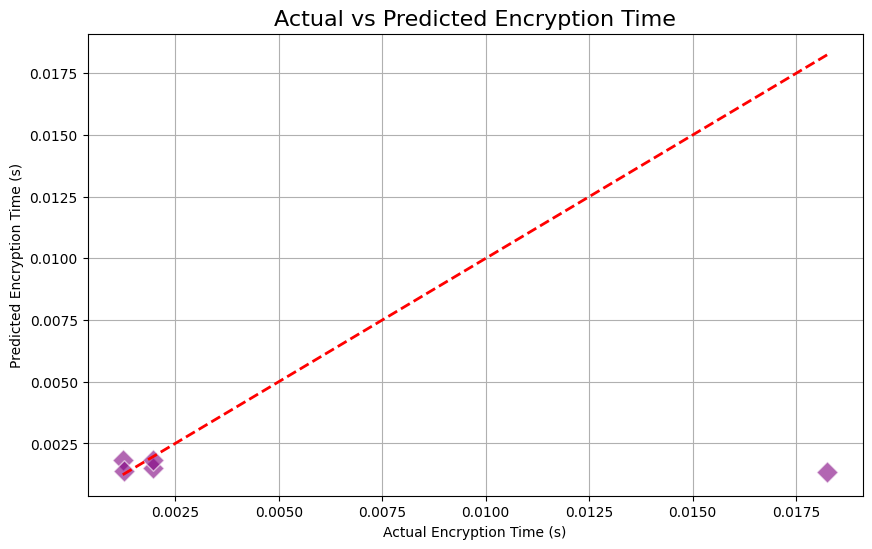

In [7]:


#1. Setup & Install Dependencies
!pip install cryptography
!pip install pycryptodome
!pip install sklearn
!pip install pandas
!pip install requests


# 2. Dataset Creation
import pandas as pd
import numpy as np
import cryptography as Crypto
from cryptography.fernet import Fernet

data = {
    'Algorithm': ['AES', 'Simon', 'Speck', 'AES', 'Simon', 'Speck'],
    'Block_Size': [128, 64, 64, 256, 128, 128],
    'Key_Size': [128, 128, 128, 256, 128, 128],
    'Encryption_Time': [0.2, 0.15, 0.13, 0.4, 0.25, 0.22],
    'Decryption_Time': [0.18, 0.14, 0.12, 0.35, 0.23, 0.21],
    'Memory_Usage': [50, 40, 30, 60, 45, 35]
}
df = pd.DataFrame(data)

# Encryption and Decryption Implementation
key = Fernet.generate_key()
cipher_suite = Fernet(key)

def encrypt_data(data):
    return cipher_suite.encrypt(data.encode())

def decrypt_data(encrypted_data):
    return cipher_suite.decrypt(encrypted_data).decode()

df['Encrypted_Algorithm'] = df['Algorithm'].apply(encrypt_data)
df['Decrypted_Algorithm'] = df['Encrypted_Algorithm'].apply(decrypt_data)

# 4. Machine Learning Model
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df['Algorithm_Code'] = df['Algorithm'].astype('category').cat.codes
X = df[['Algorithm_Code', 'Block_Size', 'Key_Size']]
y = df['Encryption_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Performance Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# 5. Security & Privacy
import hashlib
def hash_data(data):
    sha256_hash = hashlib.sha256()
    sha256_hash.update(data.encode())
    return sha256_hash.hexdigest()

initial_data_hash = hash_data(df.to_json())
current_data_hash = hash_data(df.to_json())
print("Data Integrity Verified" if initial_data_hash == current_data_hash else "Data Integrity Compromised")

# 6. Hybrid Encryption Function Setup
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES as AES_C, PKCS1_OAEP
from Crypto.Random import get_random_bytes
import time

def rsa_keypair():
    key = RSA.generate(2048)
    return key.export_key(), key.publickey().export_key()

def aes_encrypt(data, key):
    cipher = AES_C.new(key, AES_C.MODE_GCM)
    ciphertext, tag = cipher.encrypt_and_digest(data.encode())
    return cipher.nonce, ciphertext, tag

def hybrid_encrypt(data, rsa_public_key_bytes, aes_key):
    rsa_public_key = RSA.import_key(rsa_public_key_bytes)
    rsa_cipher = PKCS1_OAEP.new(rsa_public_key)
    aes_key_encrypted = rsa_cipher.encrypt(aes_key)
    nonce, ciphertext, tag = aes_encrypt(data, aes_key)
    return aes_key_encrypted, nonce, ciphertext, tag

# Data Collection Simulation
def collect_encryption_data():
    data = []
    for file_size in [50, 100, 200, 400, 800]:
        for data_type in ['text', 'image', 'audio']:
            _, public_key = rsa_keypair()
            aes_key = get_random_bytes(16)
            sample_data = 'A' * file_size
            start_time = time.time()
            hybrid_encrypt(sample_data, public_key, aes_key)
            encryption_time = time.time() - start_time
            data.append([file_size, data_type, encryption_time])
    return pd.DataFrame(data, columns=['File_Size', 'Data_Type', 'Encryption_Time'])

# ML Modeling
from sklearn.preprocessing import StandardScaler

def machine_learning_model(df):
    df['Data_Type_Code'] = df['Data_Type'].astype('category').cat.codes
    X = df[['File_Size', 'Data_Type_Code']]
    y = df['Encryption_Time']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
    plot_actual_vs_predicted(y_test, y_pred)

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, c='purple', alpha=0.6, edgecolors='w', s=120, marker='D')
    plt.title('Actual vs Predicted Encryption Time', fontsize=16)
    plt.xlabel('Actual Encryption Time (s)')
    plt.ylabel('Predicted Encryption Time (s)')
    plt.grid(True)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
    plt.show()

# Run Simulation
df_sim = collect_encryption_data()
machine_learning_model(df_sim)
